### Figure 5: remaze analyses

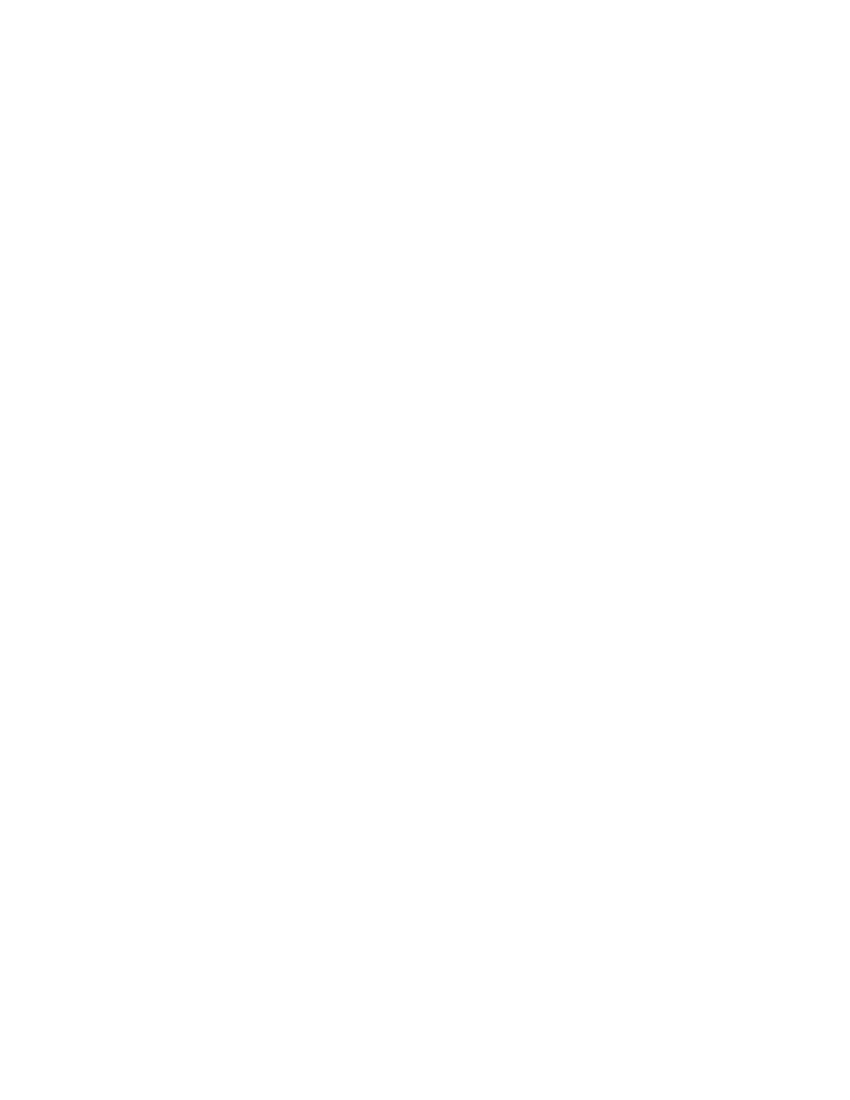

In [2]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import subjects
from subjects import sd_span, nsd_span, grp_span
import pandas as pd
import seaborn as sns
from neuropy.plotting import Fig
from scipy import stats


grpdata = subjects.GroupData()
group = ["nsd", "sd"]

# remaze_ev
ev_df = grpdata.remaze_ev

bias_df = grpdata.remaze_temporal_bias
colors_bias = subjects.colors_sd(1.2)

activation_df = grpdata.remaze_activation

fig = Fig(grid=(4, 3), hspace=0.45, wspace=0.4)
filename = subjects.figpath_sd / "figure5"
caption = "hello"

### ev

In [90]:
ax = fig.subplot(fig.gs[0])
sns.boxplot(
    data=ev_df,
    x="grp",
    y="ev",
    hue="ev_name",
    palette=["#616161", "#BDBDBD"],
    medianprops=dict(color='w',lw=1.5),
    showcaps=False,
    boxprops=dict(edgecolor='none'),
    ax=ax,
)

ax.legend('',frameon=False)

### temporal bias

In [91]:
ax = fig.subplot(fig.gs[1])
# ax.set_xlim([-5000,6000])
# ax.spines['left'].set_position(('data',0))
# ax.spines['bottom'].set_position(('data',0))

for i,grp in enumerate(group):
    sns.regplot(
        data=bias_df[bias_df['grp']==grp],
        x="maze",
        y="remaze",
        # hue="grp",
        color=colors_bias[i],
        # x_partial="pre",
        # y_partial="pre",
        scatter_kws={"s": 2,'alpha':0.3,'rasterized':True},
        # col='grp',
        ax=ax,
    )
# ax.set_xticks([])
# ax.set_yticks([])



### maze activation on remaze

In [92]:
ax = fig.subplot(fig.gs[2])
sns.boxplot(
    data=activation_df,
    x="grp",
    y="activation",
    ax=ax,
    medianprops=dict(color="w", lw=1.5),
    showcaps=False,
    boxprops=dict(edgecolor="none"),
    width=0.4,
)


<AxesSubplot:xlabel='grp', ylabel='activation'>

### saving

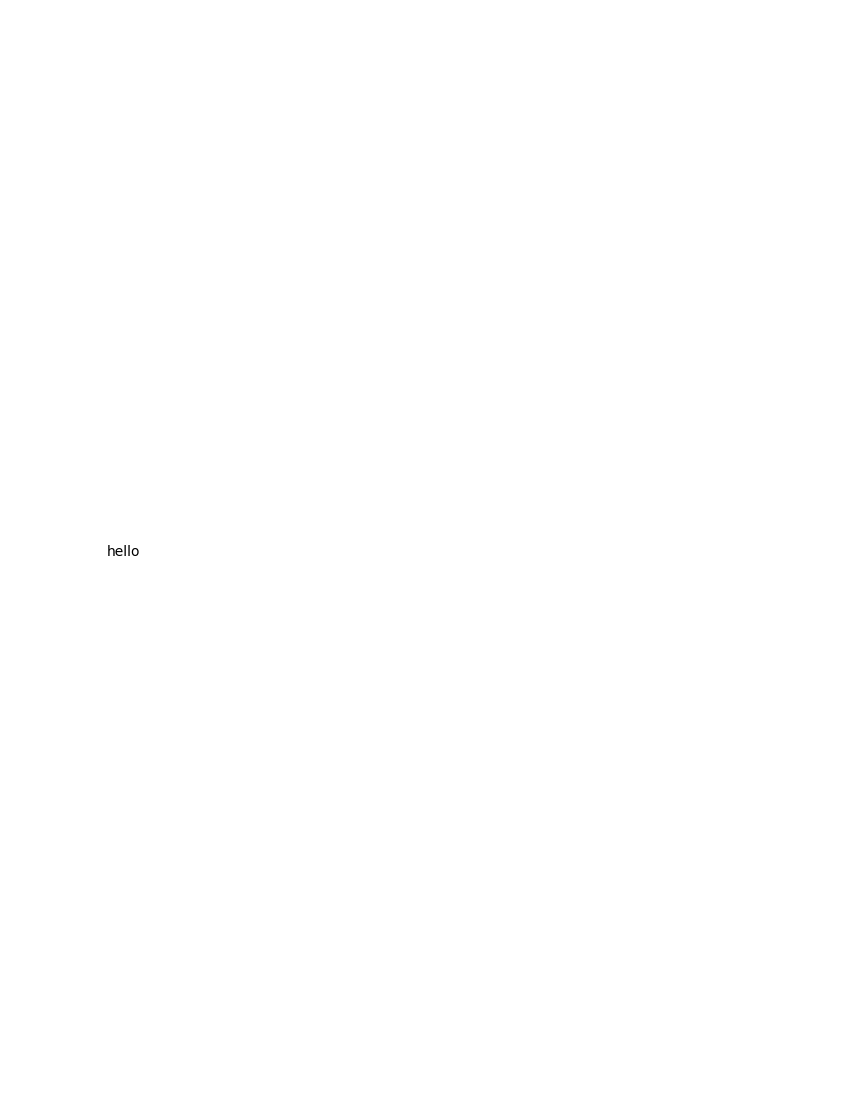

In [93]:
fig.savefig(filename,caption=caption)